# Welcome to the Dark Art of Coding:
## Introduction to Python
Datetimes in pandas

<img src='../images/dark_art_logo.600px.png' width='300' style="float:right">

In [3]:
# Let's start by importing the pertinent libraries and functions

import pandas as pd
from pandas import DataFrame, Series
import numpy as np

# Date objects

Before we go into anything `pandas` specific let's talk a little bit about the built-in library `datetime`. With it we can create datetime objects which `pandas` can use for some really cool things. Keep in mind this is a `datetime` **object** NOT a **string** that looks like a date. These `datetime` objects have attributes and behaviors we can examine and call.

In [ ]:
from datetime import datetime
from datetime import timedelta
date1 = datetime(2016, 5, 3)

In [58]:
# The printed display looks like a string
print('str display:', date1)

# But the item is an actual object 
print('object type: ', type(date1))

# The object itself:
date1

str display: 2016-05-03 00:00:00
object type:  <class 'datetime.datetime'>


datetime.datetime(2016, 5, 3, 0, 0)

Looking at our datetime object tells us that it can potentially store more than just the year, month, and day. We see two zeroes we didn't define so there must be something that can go there. Let's turn to the help documentation to see if we figure this out.

In [5]:
datetime?

Thus we learn that the datetime object can also hold data representing:

* hours
* minutes
* seconds
* microseconds
* time zones

Let's take a look at the difference between two datetime objects. Let's make two dates but one has the hour value set to **12** and one has the hour value set to **11**. Let's see the time difference between the two:

In [ ]:
date2 = datetime(2016, 5, 3, 12)
date3 = datetime(2016, 5, 3, 11)

difference = date2 - date3

In [62]:
# Let's take a look at this difference object
print('str display:', difference)

print('object type: ', type(difference))

str display: 1:00:00
object type:  <class 'datetime.timedelta'>


In [63]:
# But let's look at the object itself
difference

datetime.timedelta(0, 3600)

Most of us were probably expecting something like "1 hour" but instead we got "3600 something". Let's try looking at the help for a timedelta and see what we can find

In [7]:
timedelta?

Well that wasn't what we really expected either. Let's try using IPython's verbose help (You can get to it with the double question marks: **??**)

In [8]:
timedelta??

The verbose help shows us the source code AND in this case, we can see some additional details the author included... such as a snarky comment on what we just saw


Any category of time that does not fit one of these three categories:

* Days
* Seconds
* Microseconds

Gets converted to the closest lower category. The hour got converted to 3600 seconds

As an object if we want access to individual time categories we can use **dot notation** to access the attributes for the datetime and timedelta objects

In [65]:
print(difference.days)
print(difference.seconds)

# Want to see the other attributes and methods?
# difference.<tab>

0
3600


In [64]:
# similarly, we can see the attributes for one of our
# previous date objects:
print(date3.hour)
print(date3.day)
print(date3.month)
print(date3.year)

# Want to see the other attributes and methods?
# date3.<tab>

11
3
5
2016


datetime objects have a:

* default string representation
* an ISO representation

In [11]:
# default string format:
print(str(date3))

# ISO format:
print(date3.isoformat())

2016-05-03 11:00:00
2016-05-03T11:00:00


In addition, the `datetime` module has the ability to both read in values and write out values using **user defined** formats.

`*.strftime()`

`*.strptime()`

# string formatting:
To format the `str` output of a `datetime` object to suit your needs, you can use `strftime()` and can mix and match from the formatting specifications

In [66]:
datef = datetime(2009, 9, 9)
datef.strftime('%Y-%m-%d')

'2009-09-09'

We are not gonna go into the full collection of formatting specifications.

That is left as an exercise for the student:
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

### WARNING:

I have not confirmed this, but I have heard that the supported formatting codes vary across platforms (linux, unix, windows, mac, etc) because Python relies upon the underlying C library's strftime() function.

Purportedly, the Python Docs reflect all the formatting codes from the 1989 version of the C standard which **should be consistent across all platforms**

But some libraries may implement **additional** formatting codes.

hattip to Will McCutchen's site: http://strftime.org/

# string parsing:
Sometimes we get strings that contain dates but have unusual formatting. You can parse the string manually and convert it to a datetime object with the `strptime()` function:

In [67]:
# Presume that we have the following string that is a month, day and year separated
# by '|' symbols.
datep = '8|8|2008'
datetime.strptime(datep, '%m|%d|%Y')

# In deference to time, we are gonna leave a deep dive into the
# formatting specifications for the student.

datetime.datetime(2008, 8, 8, 0, 0)

While manually setting the formatting works, for heavy duty datetime parsing, the automagic parsing available via the dateutil module is hard to beat. 

In [70]:
from dateutil.parser import parse

d1 = '2000-01-01'
d2 = 'December 12, 2001 13:13'
d3 = '23rd January 2002 21:21:21'

for dateobject in d1, d2, d3:
    print(dateobject.ljust(35), parse(dateobject))


2000-01-01                          2000-01-01 00:00:00
December 12, 2001 13:13             2001-12-12 13:13:00
23rd January 2002 21:21:21          2002-01-23 21:21:21


# Experience Points!
---

Using the `datetime` module:

* create a `datetime` of the day of your birth
* create a `datetime` of today **including** the current time
* calculate the difference between them

Once you've done that 

* make another `datetime` of your most RECENT birthday
* calculate the difference between it and today
* calculate how many hours are represented by the seconds (hint: divide the number of seconds by 3600)

When you complete this exercise, please put your green post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../images/green_sticky.300px.png' width='200' style='float:left'>

# `pandas`
As much as it may seem like it, this talk is NOT intended to cover just the `datetime` or `dateutil` modules... but we need to cover them to give us perspective on what `pandas` can do.

Let's start by reading in a csv. We:
* read in the csv
* provide a list of column names
* identify a column for use as an index
* tell `pandas` to automagically parse the strings into dates

In [71]:
df = pd.read_csv('log_file.csv', names=['name', 'email',
                                        'fmip', 'toip',
                                        'datetime', 'lat',
                                        'long', 'payload'],
                                 index_col='datetime',
                                 parse_dates=True)

df

,name,email,fmip,toip,lat,long,payload
datetime,,,,,,,
2016-02-08 21:44:22,barry allen,ballen@jleague.org,246.167.32.21,253.36.206.4,49.55854,8.87819,32171
2016-02-07 21:44:28,barbara gordon,bgordon@jleague.org,253.36.207.192,198.240.252.129,48.14013,9.07396,34285
2016-02-06 21:44:56,kyle rayner,krayner@jleague.org,208.66.182.10,102.230.226.99,45.28336,10.38742,40287
2016-02-06 21:45:51,dinah lance,dlance@jleague.org,246.167.32.76,7.36.164.133,45.83448,8.70891,688291
2016-02-06 21:47:02,arthur curry,acurry@jleague.org,253.36.207.215,7.36.164.0,49.44709,8.05527,126609
2016-02-06 21:47:26,kara zor-el,kzor-el@jleague.org,208.66.183.214,253.36.207.215,46.22157,10.07309,862129
2016-02-06 21:48:03,kara zor-el,kzor-el@jleague.org,208.66.183.214,198.240.252.173,45.76911,10.33047,648640
2016-02-06 21:49:36,hal jordan,hjordan@jleague.org,253.36.207.148,208.66.182.184,47.99098,7.80398,496563
2016-02-06 21:50:41,kara zor-el,kzor-el@jleague.org,253.36.207.148,26.28.209.95,48.03181,10.01841,800746


From here, let's assign a label to the data held in the name column to simplify the task of referencing it.

In [17]:
names = df['name']
names

datetime
2016-02-08 21:44:22         barry allen
2016-02-07 21:44:28      barbara gordon
2016-02-06 21:44:56         kyle rayner
2016-02-06 21:45:51         dinah lance
2016-02-06 21:47:02        arthur curry
2016-02-06 21:47:26         kara zor-el
2016-02-06 21:48:03         kara zor-el
2016-02-06 21:49:36          hal jordan
2016-02-06 21:50:41         kara zor-el
2016-02-06 21:52:17    john constantine
Name: name, dtype: object

`names` is a `Series` and like any `Series`, it has an **`index`**. We can provide a label for the index as a separate entity

In [18]:
ts = names.index
ts

DatetimeIndex(['2016-02-08 21:44:22', '2016-02-07 21:44:28',
               '2016-02-06 21:44:56', '2016-02-06 21:45:51',
               '2016-02-06 21:47:02', '2016-02-06 21:47:26',
               '2016-02-06 21:48:03', '2016-02-06 21:49:36',
               '2016-02-06 21:50:41', '2016-02-06 21:52:17'],
              dtype='datetime64[ns]', name='datetime', freq=None)

Just like any index... we can select for individual entities from the index using indexing and slicing.

In [19]:
ts[5]

Timestamp('2016-02-06 21:47:26')

Within pandas, you can index using the integer count (as we saw above) *OR* using a string representation of a specific timestamp.

One of the powerful aspects of selection based on index is that you can select items from the `index`, from a `Series`, or from an entire `DataFrame`

In [73]:
time = '2016-02-06 21:47:02'
names[time]

datetime
2016-02-06 21:47:02    arthur curry
Name: name, dtype: object

Matching against a substring from within a longer string is possible as well. Here, let's match against any item in the `Series` with the substring '2016-02-06' in the index.

In [21]:
names['2016-02-06']

datetime
2016-02-06 21:44:56         kyle rayner
2016-02-06 21:45:51         dinah lance
2016-02-06 21:47:02        arthur curry
2016-02-06 21:47:26         kara zor-el
2016-02-06 21:48:03         kara zor-el
2016-02-06 21:49:36          hal jordan
2016-02-06 21:50:41         kara zor-el
2016-02-06 21:52:17    john constantine
Name: name, dtype: object

For our next trick, let's use a new DataFrame and Series from a longer dataset (~1000 records).

In [74]:
df_1000 = pd.read_csv('log_file_1000.csv', names=['name', 'email',
                                                  'fmip', 'toip',
                                                  'datetime', 'lat',
                                                  'long', 'payload'],
                                                 index_col='datetime',
                                                 parse_dates=True)

names_long = df_1000['name']

NOTE: many of the most common interpretations of a 'date and time', even if they are NOT a letter-for-letter match of the string will work for selecting dates.

This first item will bring back 740+ records that have 2015 in the year.

In [29]:
nl = names_long['2015']
nl

datetime
2015-12-31 01:24:56        diana prince
2015-12-31 01:24:57        billy batson
2015-12-31 01:25:10          hal jordan
2015-12-31 01:26:17          hal jordan
2015-12-31 01:27:56        billy batson
2015-12-30 01:28:41          wally west
2015-12-30 01:29:43          john jones
2015-12-30 01:30:25        billy batson
2015-12-30 01:31:19          clark kent
2015-12-30 01:32:36        diana prince
2015-12-29 01:32:37    john constantine
2015-12-29 01:32:52    john constantine
2015-12-28 01:34:13          john jones
2015-12-27 01:35:24          wally west
2015-12-27 01:35:27          wally west
2015-12-27 01:35:41         kyle rayner
2015-12-26 01:36:10         barry allen
2015-12-26 01:37:05         dinah lance
2015-12-25 01:38:11        arthur curry
2015-12-25 01:38:37        arthur curry
2015-12-24 01:39:03          clark kent
2015-12-24 01:40:16        victor stone
2015-12-24 01:41:39         selina kyle
2015-12-24 01:42:31    john constantine
2015-12-24 01:43:40         bru

In [76]:
names_long['September 2015']      # <--- yields ~ 181 results

datetime
2015-09-30 09:01:34         barry allen
2015-09-30 09:01:58          ray palmer
2015-09-30 09:03:05         dinah lance
2015-09-29 09:04:32         barry allen
2015-09-29 09:05:07          hal jordan
2015-09-29 09:06:37          hal jordan
2015-09-29 09:08:12      barbara gordon
2015-09-29 09:09:42          hal jordan
2015-09-29 09:11:14    john constantine
2015-09-29 09:12:52    john constantine
2015-09-28 09:14:14          clark kent
2015-09-28 09:15:29          hal jordan
2015-09-28 09:16:41          ray palmer
2015-09-28 09:17:01    john constantine
2015-09-28 09:17:17          clark kent
2015-09-27 09:17:31          wally west
2015-09-27 09:18:59    john constantine
2015-09-26 09:20:06          ray palmer
2015-09-26 09:21:41         selina kyle
2015-09-26 09:22:12        diana prince
2015-09-26 09:22:54          hal jordan
2015-09-26 09:23:00          clark kent
2015-09-26 09:24:29         barry allen
2015-09-26 09:25:05         selina kyle
2015-09-26 09:25:51        dick

In [79]:
names_long['31st Oct, 2015']       #  <--- yields ~ 9 results

datetime
2015-10-31 06:25:48    barbara gordon
2015-10-31 06:26:22       selina kyle
2015-10-31 06:27:14       kyle rayner
2015-10-31 06:27:45        john jones
2015-10-31 06:28:17      diana prince
2015-10-31 06:29:24      diana prince
2015-10-31 06:30:15      diana prince
2015-10-31 06:30:24       selina kyle
2015-10-31 06:31:08       barry allen
Name: name, dtype: object

If the datetime information in the DataFrame/Series is in chronological order you can use slice syntax

In [80]:
names_long['Oct, 29 2015':'Oct, 31 2015']         # <--- yields ~ 28 results

datetime
2015-10-31 06:25:48      barbara gordon
2015-10-31 06:26:22         selina kyle
2015-10-31 06:27:14         kyle rayner
2015-10-31 06:27:45          john jones
2015-10-31 06:28:17        diana prince
2015-10-31 06:29:24        diana prince
2015-10-31 06:30:15        diana prince
2015-10-31 06:30:24         selina kyle
2015-10-31 06:31:08         barry allen
2015-10-30 06:31:34        arthur curry
2015-10-30 06:31:49        diana prince
2015-10-30 06:32:29        victor stone
2015-10-30 06:32:31        diana prince
2015-10-30 06:34:01        diana prince
2015-10-30 06:35:23         kyle rayner
2015-10-30 06:35:24    john constantine
2015-10-29 06:35:31         kyle rayner
2015-10-29 06:36:44         dinah lance
2015-10-29 06:37:22         kara zor-el
2015-10-29 06:37:35         dinah lance
2015-10-29 06:38:09         dinah lance
2015-10-29 06:39:04         dinah lance
2015-10-29 06:39:55        diana prince
2015-10-29 06:41:15          hal jordan
2015-10-29 06:42:08        dick

Next, we are gonna ingest a dataset, but we will apply a function to truncate the datetime string to only represent the date.

We define a simple function to split the datetime strings into dates and times, and retain only the dates. `pandas` allows us to apply the function when we read in the data using the 'converters' argument of the `read_csv()` function.

In [ ]:
def date_split(dt):
    return dt.split('T')[0]

In [133]:
df2_long = pd.read_csv('log_file_1000.csv', names=['name', 'email',
                                                   'fmip', 'toip', 
                                                   'datetime', 'lat',
                                                   'long', 'payload'],
                      index_col='datetime',
                      converters={'datetime':date_split},
                      parse_dates=True)

df2_long[['name', 'lat', 'long', 'payload']]

,name,lat,long,payload
datetime,,,,
2016-02-08,barry allen,49.83160,8.01485,764272
2016-02-08,arthur curry,45.10327,11.68293,249206
2016-02-08,john jones,47.11673,10.35874,856820
2016-02-07,wally west,46.75616,11.47886,593774
2016-02-07,arthur curry,48.59134,12.30683,171910
2016-02-07,ray palmer,45.23082,10.90642,300389
2016-02-07,victor stone,48.20129,10.54183,916813
2016-02-07,kyle rayner,48.85730,9.23887,421284
2016-02-06,clark kent,48.05990,9.97774,458476


With the new dataset, we can see many dates that duplicate or repeat, which means that we have the capability to group by those dates.

In [107]:
grouped = df2_long.name.groupby(level=0)  # groupby the zeroeth
                                          # level of the index 
                                          # hierarchy    

In [108]:
# Now, let's quickly check the size of the groups...

grouped.size()

datetime
2015-09-04     2
2015-09-05     3
2015-09-06     6
2015-09-07     7
2015-09-08     9
2015-09-09    11
2015-09-10     6
2015-09-11     2
2015-09-12     4
2015-09-13     4
2015-09-14    13
2015-09-15    13
2015-09-16     6
2015-09-17    16
2015-09-18    21
2015-09-19     5
2015-09-20     7
2015-09-21     3
2015-09-22     1
2015-09-23     1
2015-09-24     5
2015-09-25     7
2015-09-26    12
2015-09-27     2
2015-09-28     5
2015-09-29     7
2015-09-30     3
2015-10-01     1
2015-10-02     6
2015-10-03     4
              ..
2016-01-10     5
2016-01-11     7
2016-01-12    16
2016-01-13     8
2016-01-14    11
2016-01-15     1
2016-01-16     7
2016-01-17    11
2016-01-18     6
2016-01-19    13
2016-01-20     5
2016-01-21     5
2016-01-22     8
2016-01-23     4
2016-01-24     1
2016-01-25     8
2016-01-26     3
2016-01-27     2
2016-01-28    17
2016-01-29     8
2016-01-30     8
2016-01-31     9
2016-02-01     3
2016-02-02     4
2016-02-03     3
2016-02-04     2
2016-02-05     9
2016-

# Experience Points
---

* Read in the same data set (`log_file_1000.csv`) as a `pandas DataFrame`
* Create separate `DataFrame` that only includes rows between the
    * 29th of December 2015
    * 5th of January 2016
    
* Confirm that your `DataFrame` only contains the dates that you want


When you complete this exercise, please put your green post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../images/green_sticky.300px.png' width='200' style='float:left'>

In [141]:
df2_long = pd.read_csv('log_file_1000.csv', names=['name', 'email',
                                                   'fmip', 'toip', 
                                                   'datetime', 'lat',
                                                   'long', 'payload'],
                      index_col='datetime',
                      converters={'datetime':date_split},
                      parse_dates=True)

In [142]:
# Occasionally, our time series doesn't have all the periods
# that we might want... resampling can solve that problem.
# Similarly, sometimes our time series might have too many samples

df_res = df2_long.resample('4h')

In [145]:
for sample_name, grp in df_res:
    print(sample_name, grp[['name', 'payload']])

2015-09-04 00:00:00                    name  payload
datetime                        
2015-09-04   ray palmer   575482
2015-09-04  bruce wayne    42810
2015-09-04 04:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-09-04 08:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-09-04 12:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-09-04 16:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-09-04 20:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-09-05 00:00:00                     name  payload
datetime                         
2015-09-05    clark kent   572009
2015-09-05  billy batson   520973
2015-09-05   bruce wayne   193138
2015-09-05 04:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-09-05 08:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-09-05 12:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-09-05 16:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-09-05 20:00:00

2015-09-29 20:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-09-30 00:00:00                    name  payload
datetime                        
2015-09-30  barry allen   800737
2015-09-30   ray palmer   799944
2015-09-30  dinah lance   963479
2015-09-30 04:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-09-30 08:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-09-30 12:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-09-30 16:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-09-30 20:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-10-01 00:00:00                     name  payload
datetime                         
2015-10-01  diana prince   967369
2015-10-01 04:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-10-01 08:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-10-01 12:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-10-01 16:00:00 Empty DataFrame
Columns: [name, pa

2015-10-25 08:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-10-25 12:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-10-25 16:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-10-25 20:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-10-26 00:00:00                    name  payload
datetime                        
2015-10-26  kyle rayner   846743
2015-10-26   john jones   825636
2015-10-26  kara zor-el    70207
2015-10-26  kara zor-el   591926
2015-10-26   hal jordan   761608
2015-10-26 04:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-10-26 08:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-10-26 12:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-10-26 16:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-10-26 20:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-10-27 00:00:00                     name  payload
datetime                         
2015-10-27    john jon

2015-11-22 12:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-11-22 16:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-11-22 20:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-11-23 00:00:00                     name  payload
datetime                         
2015-11-23   kara zor-el   247685
2015-11-23   dinah lance   190487
2015-11-23   selina kyle   402508
2015-11-23   dinah lance     2600
2015-11-23  billy batson   608066
2015-11-23   barry allen   618621
2015-11-23  arthur curry   329679
2015-11-23   kyle rayner   159520
2015-11-23 04:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-11-23 08:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-11-23 12:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-11-23 16:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-11-23 20:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-11-24 00:00:00                     name  payload
datetime          

2015-12-21 04:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-12-21 08:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-12-21 12:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-12-21 16:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-12-21 20:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-12-22 00:00:00                    name  payload
datetime                        
2015-12-22  kyle rayner   243129
2015-12-22   clark kent   594147
2015-12-22 04:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-12-22 08:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-12-22 12:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-12-22 16:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-12-22 20:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2015-12-23 00:00:00                     name  payload
datetime                         
2015-12-23    clark kent   544949
2015-12-23  bill

Index: []
2016-01-17 20:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2016-01-18 00:00:00                         name  payload
datetime                             
2016-01-18    barbara gordon   113150
2016-01-18       selina kyle   280153
2016-01-18  john constantine   197413
2016-01-18    barbara gordon   857375
2016-01-18      arthur curry   659753
2016-01-18      billy batson   591092
2016-01-18 04:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2016-01-18 08:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2016-01-18 12:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2016-01-18 16:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2016-01-18 20:00:00 Empty DataFrame
Columns: [name, payload]
Index: []
2016-01-19 00:00:00                         name  payload
datetime                             
2016-01-19        clark kent   549985
2016-01-19       selina kyle   159984
2016-01-19       kyle rayner   582385
2016-01-19      billy batson  

In [146]:
df2_long = pd.read_csv('log_file_1000.csv', names=['name', 'email',
                                                   'fmip', 'toip', 
                                                   'datetime', 'lat',
                                                   'long', 'payload'],
                      index_col='datetime',
                      converters={'datetime':date_split},
                      parse_dates=True)

In [150]:
df_res2D = df2_long.resample('2D')

In [155]:
for sample_name, grp in df_res2D:
    print(sample_name, grp[['name', 'payload']])
    print('-' * 40)

2015-09-04 00:00:00                     name  payload
datetime                         
2015-09-04    ray palmer   575482
2015-09-04   bruce wayne    42810
2015-09-05    clark kent   572009
2015-09-05  billy batson   520973
2015-09-05   bruce wayne   193138
----------------------------------------
2015-09-06 00:00:00                         name  payload
datetime                             
2015-09-06      arthur curry   180883
2015-09-06      arthur curry    56427
2015-09-06    barbara gordon   465874
2015-09-06  john constantine   381008
2015-09-06      arthur curry    52774
2015-09-06       selina kyle   646359
2015-09-07      billy batson   433466
2015-09-07      arthur curry     4553
2015-09-07      dick grayson   979864
2015-09-07      billy batson     4763
2015-09-07        clark kent   807268
2015-09-07      dick grayson   993459
2015-09-07      dick grayson   255782
----------------------------------------
2015-09-08 00:00:00                       name  payload
datetime      

In [84]:
# When resampling, by default, pandas applies the mean if
# that processing makes sense.... 
# We will also see other ways of handling resampling.

# Frequencies are defined as a base frequency and a multiplier...
#   2M - every two months
#   2h30min - every two hours, 30 mins
#   D - daily
#   B - business daily

#   BM - End of the business month

#   W-MON - weekly on a given day of the week
#   WOM-1TUE - week of the month(1st, 2nd, etc) and day of week
#   QS-JAN - start of the quarter

Often, knowing how to handle Time Zones is important... especially in ensuring accuracy across time zones. Let's take just the first 10 lines of the column `name` in the long file. At this moment, there is no explicit time zone associated with these time stamps. This is referred to as time zone naive

In [156]:
times = df_1000.name[:10]
print(times.index.tz)
print(times)

None
datetime
2016-02-08 21:44:41       barry allen
2016-02-08 21:45:37      arthur curry
2016-02-08 21:46:53        john jones
2016-02-07 21:47:12        wally west
2016-02-07 21:48:04      arthur curry
2016-02-07 21:48:54        ray palmer
2016-02-07 21:49:02      victor stone
2016-02-07 21:49:26       kyle rayner
2016-02-06 21:50:26        clark kent
2016-02-06 21:50:50    barbara gordon
Name: name, dtype: object


To translate from naive to a specific timezone, we use the localize function. Common practice is to define the 'local' timezone using the standard name.

In [157]:
times_est = times.tz_localize('US/Eastern')
print(times.index.tz)
times_est

None


datetime
2016-02-08 21:44:41-05:00       barry allen
2016-02-08 21:45:37-05:00      arthur curry
2016-02-08 21:46:53-05:00        john jones
2016-02-07 21:47:12-05:00        wally west
2016-02-07 21:48:04-05:00      arthur curry
2016-02-07 21:48:54-05:00        ray palmer
2016-02-07 21:49:02-05:00      victor stone
2016-02-07 21:49:26-05:00       kyle rayner
2016-02-06 21:50:26-05:00        clark kent
2016-02-06 21:50:50-05:00    barbara gordon
Name: name, dtype: object

Once you set the local timezone for a TimeSeries, you can convert it to align to other time zones. In this case, we see that 

In [160]:
times_hi = times_est.tz_convert('US/Hawaii')
times_hi

# February is during that window when the
#     HI <-> EST offset is five hours.

datetime
2016-02-08 16:44:41-10:00       barry allen
2016-02-08 16:45:37-10:00      arthur curry
2016-02-08 16:46:53-10:00        john jones
2016-02-07 16:47:12-10:00        wally west
2016-02-07 16:48:04-10:00      arthur curry
2016-02-07 16:48:54-10:00        ray palmer
2016-02-07 16:49:02-10:00      victor stone
2016-02-07 16:49:26-10:00       kyle rayner
2016-02-06 16:50:26-10:00        clark kent
2016-02-06 16:50:50-10:00    barbara gordon
Name: name, dtype: object

Combinations between two different timezones will result in an output normalized to UTC

Thus far, we have dealt predominantly with potentially irregularly timestamped data. One of the other main classes of timing data is periodic time spans such as years, months, minutes.

In [164]:
period = pd.Period(2015, freq='W-MON')
period

Period('2014-12-30/2015-01-05', 'W-MON')

This period represents a single time span across one week at the end of 2014/beginning of 2015, starting on a Mon.

To see a sequence or range of periods, you can use the `period_range()` function

In [165]:
per_range = pd.period_range('12/12/2010', '12/12/2015', freq='Q')
per_range

PeriodIndex(['2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1',
             '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3',
             '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1',
             '2015Q2', '2015Q3', '2015Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

To convert a Period to a different frequency, you can use the *.asfreq() function:

In [167]:
period.asfreq('W', how='start')

# the default starting day is Sun, but this is configurable.


Period('2014-12-29/2015-01-04', 'W-SUN')

We can similarly convert whole sequences of periods:

In [171]:
per_range.asfreq('D', how='start')

PeriodIndex(['2010-10-01', '2011-01-01', '2011-04-01', '2011-07-01',
             '2011-10-01', '2012-01-01', '2012-04-01', '2012-07-01',
             '2012-10-01', '2013-01-01', '2013-04-01', '2013-07-01',
             '2013-10-01', '2014-01-01', '2014-04-01', '2014-07-01',
             '2014-10-01', '2015-01-01', '2015-04-01', '2015-07-01',
             '2015-10-01'],
            dtype='period[D]', freq='D')

In [172]:
df_period = df_1000.to_period('M')
df_period

,name,email,fmip,toip,lat,long,payload
datetime,,,,,,,
2016-02,barry allen,ballen@jleague.org,155.130.121.215,75.122.133.241,49.83160,8.01485,764272
2016-02,arthur curry,acurry@jleague.org,106.152.115.161,106.152.114.248,45.10327,11.68293,249206
2016-02,john jones,jjones@jleague.org,60.15.193.250,155.130.121.215,47.11673,10.35874,856820
2016-02,wally west,wwest@jleague.org,190.214.22.201,190.214.22.116,46.75616,11.47886,593774
2016-02,arthur curry,acurry@jleague.org,60.15.193.74,60.15.193.95,48.59134,12.30683,171910
2016-02,ray palmer,rpalmer@jleague.org,106.152.114.248,102.86.56.203,45.23082,10.90642,300389
2016-02,victor stone,vstone@jleague.org,60.15.193.95,155.130.121.215,48.20129,10.54183,916813
2016-02,kyle rayner,krayner@jleague.org,220.211.18.48,106.152.115.49,48.85730,9.23887,421284
2016-02,clark kent,ckent@jleague.org,106.152.114.248,190.214.22.201,48.05990,9.97774,458476


To convert back to timestamps...

The day of the month data gets lost in the above conversion, so pandas resorts to a default of the first day of the month.

In [173]:
df_ts = df_period.to_timestamp(how='start')
df_ts

,name,email,fmip,toip,lat,long,payload
datetime,,,,,,,
2016-02-01,barry allen,ballen@jleague.org,155.130.121.215,75.122.133.241,49.83160,8.01485,764272
2016-02-01,arthur curry,acurry@jleague.org,106.152.115.161,106.152.114.248,45.10327,11.68293,249206
2016-02-01,john jones,jjones@jleague.org,60.15.193.250,155.130.121.215,47.11673,10.35874,856820
2016-02-01,wally west,wwest@jleague.org,190.214.22.201,190.214.22.116,46.75616,11.47886,593774
2016-02-01,arthur curry,acurry@jleague.org,60.15.193.74,60.15.193.95,48.59134,12.30683,171910
2016-02-01,ray palmer,rpalmer@jleague.org,106.152.114.248,102.86.56.203,45.23082,10.90642,300389
2016-02-01,victor stone,vstone@jleague.org,60.15.193.95,155.130.121.215,48.20129,10.54183,916813
2016-02-01,kyle rayner,krayner@jleague.org,220.211.18.48,106.152.115.49,48.85730,9.23887,421284
2016-02-01,clark kent,ckent@jleague.org,106.152.114.248,190.214.22.201,48.05990,9.97774,458476


Once resampled we can use different methods to display our data... Remember mean is default but we can use others

Use the resample method then use the method you want on it after the fact

In [51]:
df_1000[['lat', 'long']].resample('Q', kind='period').mean()

,lat,long
datetime,,
2015Q3,47.526516,10.192719
2015Q4,47.513139,10.065601
2016Q1,47.601070,10.113786


methods you can use:
* mean
* median
* std
* first
* last
* min
* max
* var
* count

As a wrap-up, let's take a look at plotting some of this data. (For more examples of plotting, one of our earlier demo scripts has a variety of sample plots. Also, matplotlib has an extensive library of sample plots).

We'll start with setting up the interactive environment so we an manipulate the graph

In [187]:
import matplotlib.pyplot as plt


In [188]:
# From there, we create a reduced dataset and create a subplot that is two rows
# high, one column wide and we activate the first subplot. Then we set up the
# graph for that subplot to display the latitude in black circles.

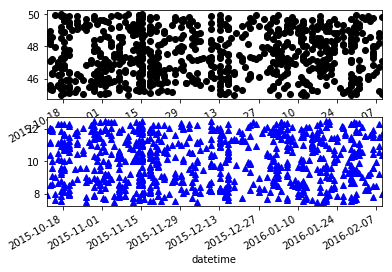

In [189]:
df_1000 = df_1000[['lat', 'long']][:750]
plt.subplot(2, 1, 1)
df_1000['lat'].plot(style='ko')


# Next we activate the second subplot and set up the graph for that subplot to
# display the longitude in
plt.subplot(2, 1, 2)
df_1000['long'].plot(style='b^')